In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras import Input
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import itertools

In [28]:
import os
train_image_files_path='C:/Users/ADMIN/Downloads/newdata/datanumber/filetrain'
valid_image_files_path='C:/Users/ADMIN/Downloads/newdata/datanumber/filevalid'

In [29]:
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [30]:
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [31]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(31,43),
    class_mode='categorical'
)

valid_generator = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(31,43),
    class_mode='categorical'
)

Found 767 images belonging to 10 classes.
Found 167 images belonging to 10 classes.


In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=Sequential()

#LopCNN1
model.add(Conv2D(4,(3,3), activation='relu',input_shape=(31,43,3)))
model.add(MaxPooling2D(2,2))
#LopCNN2
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#LopCNN3
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(80,activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 41, 4)         112       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 20, 4)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 18, 32)        1184      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 7, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 3, 64)        

In [36]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [37]:
EPOCHS=80
history=model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=EPOCHS,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=5
)

Epoch 1/80
20/20 [==============================] - 7s 305ms/step - loss: 2.1983 - acc: 0.2520 - val_loss: 2.1536 - val_acc: 0.2875
Epoch 2/80
20/20 [==============================] - 2s 89ms/step - loss: 1.7895 - acc: 0.4210 - val_loss: 1.9094 - val_acc: 0.3250
Epoch 3/80
20/20 [==============================] - 1s 44ms/step - loss: 1.4029 - acc: 0.5227 - val_loss: 1.6988 - val_acc: 0.4563
Epoch 4/80
20/20 [==============================] - 1s 41ms/step - loss: 1.0509 - acc: 0.6416 - val_loss: 1.3647 - val_acc: 0.5875
Epoch 5/80
20/20 [==============================] - 1s 43ms/step - loss: 0.7713 - acc: 0.7844 - val_loss: 1.2209 - val_acc: 0.6438
Epoch 6/80
20/20 [==============================] - 1s 43ms/step - loss: 0.5898 - acc: 0.8216 - val_loss: 1.0058 - val_acc: 0.6812
Epoch 7/80
20/20 [==============================] - 1s 40ms/step - loss: 0.4307 - acc: 0.8858 - val_loss: 1.0722 - val_acc: 0.6687
Epoch 8/80
20/20 [==============================] - 1s 40ms/step - loss: 0.3176 - 

In [10]:
# # Chuyển đổi mô hình thành TensorFlow Lite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Lưu mô hình TensorFlow Lite vào file
# with open('converted_model.tflite', 'wb') as f:
#     f.write(tflite_model)



1/1 [==============================] - 0s 36ms/step
Gia tri du doan: 0


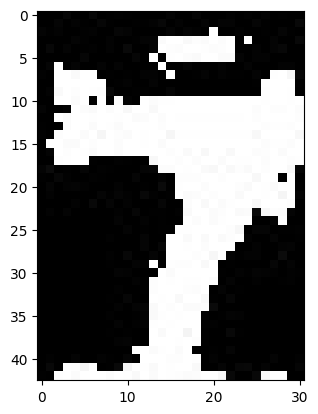

In [27]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils
from matplotlib import pyplot as plt
from flatten_json import flatten
from scipy.ndimage import median_filter

# for i in range (8):
    # img_path='C:/Users/ADMIN/Downloads/datanumber/filetest/9b/9b ('+str(i+1)+').jpg'

img_path='C:/Users/ADMIN/Downloads/PIC1.jpg'
img_gray = cv.imread(img_path)

resized_image = cv.resize(img_gray, (31, 43))

plt.imshow(resized_image)

x=tf.keras.utils.img_to_array(resized_image)
# x = np.transpose(x, (1, 0, 2))
x=np.expand_dims(x,axis=0)
images= np.vstack([x])
y_predict = model.predict(images, batch_size=10)
predicted_numbers = np.argmax(y_predict, axis=1)
print('Gia tri du doan:', label[np.argmax(y_predict)])